In [2]:
import pandas as pd



import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

train_features = pd.read_csv("../extract_new_feature/train_new_features.csv").sort_values(by='pid')
#test = pd.read_csv("../extract_new_feature/test_new_features.csv").sort_values(by='pid')
train_labels = pd.read_csv("../../train_labels.csv").sort_values(by='pid')

In [3]:
train_labels.head()

,pid,LABEL_BaseExcess,LABEL_Fibrinogen,LABEL_AST,LABEL_Alkalinephos,LABEL_Bilirubin_total,LABEL_Lactate,LABEL_TroponinI,LABEL_SaO2,LABEL_Bilirubin_direct,LABEL_EtCO2,LABEL_Sepsis,LABEL_RRate,LABEL_ABPm,LABEL_SpO2,LABEL_Heartrate
0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.1,85.4,100.0,59.9
6622,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.4,99.1,95.4,65.8
15008,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.8,78.8,97.4,71.8
16335,6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,17.9,75.1,97.3,80.7
17676,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.7,112.8,97.0,92.6


In [4]:
# Let's first look at the class imbalance

TESTS = ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total',
         'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2',
         'LABEL_Bilirubin_direct', 'LABEL_EtCO2']

for labels in TESTS:
    neg, pos = np.bincount(train_labels[labels])
    total = neg + pos
    print('Label:{}\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(labels, total, pos, 100 * pos / total))

Label:LABEL_BaseExcess
    Total: 18995
    Positive: 5096 (26.83% of total)

Label:LABEL_Fibrinogen
    Total: 18995
    Positive: 1400 (7.37% of total)

Label:LABEL_AST
    Total: 18995
    Positive: 4554 (23.97% of total)

Label:LABEL_Alkalinephos
    Total: 18995
    Positive: 4487 (23.62% of total)

Label:LABEL_Bilirubin_total
    Total: 18995
    Positive: 4570 (24.06% of total)

Label:LABEL_Lactate
    Total: 18995
    Positive: 3803 (20.02% of total)

Label:LABEL_TroponinI
    Total: 18995
    Positive: 1895 (9.98% of total)

Label:LABEL_SaO2
    Total: 18995
    Positive: 4439 (23.37% of total)

Label:LABEL_Bilirubin_direct
    Total: 18995
    Positive: 644 (3.39% of total)

Label:LABEL_EtCO2
    Total: 18995
    Positive: 1254 (6.60% of total)



### This shows we are dealing with class imbalance !

## Let's try Support Vector Machines and Random Forest 

LABEL_BaseExcess
Mean Cross-validated AUC score (RF)=  0.9157865802626528
Mean Cross-validated AUC score (SVC)=  0.8829351856282244
-----------------------------------------------------


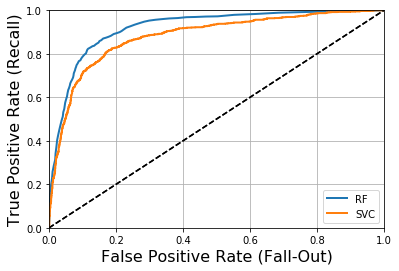

AUC (RF) =  0.9202932060632163
AUC (SVC) =  0.8800913930288545
---------------------------------------------------------------
LABEL_Fibrinogen
Mean Cross-validated AUC score (RF)=  0.78836258400947
Mean Cross-validated AUC score (SVC)=  0.7532827011812012
-----------------------------------------------------


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import metrics


# Let's define a function to plot a ROC curve


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 
    
    
    



TESTS = ['LABEL_BaseExcess', 'LABEL_Fibrinogen', 'LABEL_AST', 'LABEL_Alkalinephos', 'LABEL_Bilirubin_total',
          'LABEL_Lactate', 'LABEL_TroponinI', 'LABEL_SaO2',
          'LABEL_Bilirubin_direct', 'LABEL_EtCO2']

auc_values_val_rf = []
auc_values_val_svc = []

for label in TESTS:
    
    print(label)
    
    X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels[label], test_size=0.2, random_state=2020, stratify = train_labels[label])

    # Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled = pd.DataFrame(X_train_scaled, columns = train_features.columns)
    X_val_scaled = scaler.transform(X_val)
    X_val_scaled = pd.DataFrame(X_val_scaled, columns = train_features.columns)


    feature_cols = X_train.columns.values[(X_train.columns.values != 'pid') & (X_train.columns.values != 'Time')]

    X_train = X_train[feature_cols]
    X_val = X_val[feature_cols]
    
    feature_cols_scaled = X_train_scaled.columns.values[(X_train_scaled.columns.values != 'pid') & (X_train_scaled.columns.values != 'Time')]

    X_train_scaled = X_train_scaled[feature_cols]
    X_val_scaled = X_val_scaled[feature_cols]
    
    
    
    
    forest_clf = RandomForestClassifier(random_state=42)
    svc = SVC(kernel = 'rbf', random_state=42, probability=True)
    skf = StratifiedKFold(n_splits=5)
    auc_scores_rf = cross_val_score(forest_clf, X_train, y_train, scoring = 'roc_auc', cv = skf, n_jobs = -1)
    auc_scores_svc = cross_val_score(svc, X_train_scaled, y_train, scoring = 'roc_auc', cv = skf, n_jobs = -1)
#    print("AUC scores = ", auc_scores)
    print("Mean Cross-validated AUC score (RF)= ", np.mean(auc_scores_rf))
    print("Mean Cross-validated AUC score (SVC)= ", np.mean(auc_scores_svc))
    print("-----------------------------------------------------")
    
    # Let's check models performance on Validation set 
    
    forest_clf.fit(X_train, y_train)
    svc.fit(X_train_scaled, y_train)
    
    predictions_prob_val_rf = forest_clf.predict_proba(X_val)
    predictions_prob_val_svc = svc.predict_proba(X_val_scaled)
    
    predict_prob_val_rf = np.ravel(predictions_prob_val_rf[:,1])
    predict_prob_val_svc = np.ravel(predictions_prob_val_svc[:,1])
    
    fpr, tpr, thresholds_rf = roc_curve(y_val,predict_prob_val_rf)
    fpc, tpc, thresholds_svc = roc_curve(y_val,predict_prob_val_svc)
        
    plot_roc_curve(fpr, tpr, "RF")
    plot_roc_curve(fpc, tpc, "SVC")
    
    plt.legend(loc="lower right")
    plt.show()

    auc_val_rf = metrics.roc_auc_score(y_val, predict_prob_val_rf)
    auc_val_svc = metrics.roc_auc_score(y_val, predict_prob_val_svc)
    
    print("AUC (RF) = ", auc_val_rf)
    print("AUC (SVC) = ", auc_val_svc)
    
    auc_values_val_rf.append((auc_val_rf))
    auc_values_val_svc.append((auc_val_svc))
    print("---------------------------------------------------------------")



print ("Mean AUC (Random Forest) = ", np.mean(auc_values_val_rf))
print ("Mean AUC (SVC) = ", np.mean(auc_values_val_svc))




### We can see that for all the labels, RandomForest outperforms the Support vector classififer. Let's now fine-tune our RandomForest Classifier.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
from sklearn import metrics


auc_values_val_rf = []

for label in TESTS:
    
    print(label)
    
    X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels[label], test_size=0.2, random_state=2020, stratify = train_labels[label])

    # Normalize the input features using the sklearn StandardScaler. This will set the mean to 0 and standard deviation to 1.

#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_train = pd.DataFrame(X_train, columns = train_features.columns)
#     X_val= scaler.transform(X_val)
#     X_val = pd.DataFrame(X_val,columns = train_features.columns)


    feature_cols = X_train.columns.values[(X_train.columns.values != 'pid') & (X_train.columns.values != 'Time')]

    X_train = X_train[feature_cols]
    X_val = X_val[feature_cols]
    
    
    forest_clf = RandomForestClassifier(random_state=42)
    skf = StratifiedKFold(n_splits=5)
    
    param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'log2'],
    'criterion' :['gini','entropy']}    
    
    CV_rf = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv = skf, scoring = 'roc_auc', n_jobs = -1)
    
    CV_rf.fit(X_train, y_train)
    forest_clf.fit(X_train, y_train)
    
    #Without fine tuning 
    
    predictions_prob_val = forest_clf.predict_proba(X_val)
    
    predict_prob_val = np.ravel(predictions_prob_val[:,1])
  
    auc_val = metrics.roc_auc_score(y_val, predict_prob_val)
    
    print("AUC (Without fine tuning) = ", auc_val)
    
    # With fine tuning 
    
    print("Best parameters after Grid Search CV")
        
    print(CV_rf.best_params_)                  
    
    predictions_prob_val_rf = CV_rf.predict_proba(X_val)
    
    predict_prob_val_rf = np.ravel(predictions_prob_val_rf[:,1])
  
    auc_val_rf = metrics.roc_auc_score(y_val, predict_prob_val_rf)
    
    print("AUC with best parameters = ", auc_val_rf)
    
    auc_values_val_rf.append((auc_val_rf))
    print("---------------------------------------------------------------")

## Observations from Hyperparameter tuning :

### 1.'entropy' is preferred criterion for all the labels.
### 2. N_estimators = 200 is preferred for all the labels.
### 3. For some labels, 'log2' is preferred while for others, 'auto' is preferred.

### Further increase in n_estimators do not lead to significant increase in the AUC. So let's just stick with 200

In [ ]:
np.mean(auc_values_val_rf)